In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import (precision_recall_curve,PrecisionRecallDisplay)
from sklearn.metrics import roc_auc_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
class ANN:
    def __init__(self,epochs,lr,b1,b2):
        self.epochs=epochs
        self.lr=lr
        self.weight_collector={}
        self.loss_history=[]
        self.smoothing=1e-15
        self.alpha=1e-5
        self.w1=[]
        self.w2=[]
        self.w3=[]
        self.best_weights=[None,None,None]
        self.b1=b1 # some constant value
        self.b2=b2
        self.loss_thresold=float("inf")

    def fit(self,X_train,y_train):
        itr_numb=X_train.shape[0]
        #initializing weights using he normal 
        self.w1=np.random.randn(3)*np.sqrt(2/1)
        print(self.w1)
        #Node 2 initialization
        self.w2=np.random.randn(3)*np.sqrt(2/3)
        print(self.w2)

        #Node 3 initialization 
        self.w3=np.random.randn(2)*np.sqrt(2/2)
        print(self.w3)
 
        # Weight adjustments
        for k in range(0,self.epochs):
            loss_sum=0
            for i in range(0,itr_numb):
                #Node 1
                # multiplying weights with input 
                x_vec = X_train[i]
                node1_out = np.dot(x_vec,self.w1)+self.b1
                if node1_out<0:
                  node1_out = self.alpha*(node1_out)
                else:
                  node1_out = max(0,node1_out) # relu

                #Node 2
                x_vec = X_train[i]
                node2_out = np.dot(x_vec,self.w2)+self.b1
                if node2_out<0:
                  node2_out = self.alpha*(node2_out)
                else:
                  node2_out = max(0,node2_out) # relu

                #Node 3

                #Output layer

                out_layer = [node1_out,node2_out]

                # multiplying weights with input 
                x_vec = X_train[i]
                out_node = np.dot(out_layer,self.w3)+self.b2
                y_out=(1/(1+np.exp(-out_node)))

                #Loss/Cost function and weight updation

                # for node 1
                slope1 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*
                            np.exp(-out_node)*(self.w3[0]*X_train[i][0]))-
                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow(
                          (1+np.exp(out_node)),2))*np.exp(out_node)*
                           (self.w3[0]*X_train[i][0]))
                self.w1[0] = self.w1[0]-(self.lr*slope1)

                slope2 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*
                            np.exp(-out_node)*(self.w3[0]*X_train[i][1]))-
                           ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow(
                            (1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*X_train[i][1]))
                self.w1[1] = self.w1[1]-(self.lr*slope2)

                slope3 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*
                            np.exp(-out_node)*(self.w3[0]*X_train[i][2]))-
                            ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow(
                            (1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*X_train[i][2]))
                self.w1[1] = self.w1[1]-(self.lr*slope3)

                # for node 2
                slope4 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*
                            np.exp(-out_node)*(self.w3[1]*X_train[i][0]))-
                            ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow(
                            (1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][0]))
                self.w2[0] = self.w2[0]-(self.lr*slope4)

                slope5 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*
                            np.exp(-out_node)*(self.w3[1]*X_train[i][1]))-
                            ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow(
                            (1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][1]))
                self.w2[1] = self.w2[1]-(self.lr*slope5)

                slope6 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*
                            np.exp(-out_node)*(self.w3[1]*X_train[i][2]))-
                            ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow(
                            (1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[1]*X_train[i][2]))
                self.w2[1] = self.w2[1]-(self.lr*slope6)

                #for output node 

                slope7 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*
                            np.exp(-out_node)*(node1_out)-
                          ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow(
                          (1+np.exp(out_node)),2))*np.exp(out_node)*(node1_out)))
                self.w3[0] = self.w3[0]-(self.lr*slope7)

                slope8 = -(((y_train.iloc[i]/(y_out+self.smoothing))*(1/pow((1+np.exp(-out_node)),2))*
                            np.exp(-out_node)*(node2_out)-
                            ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*(1/pow(
                            (1+np.exp(out_node)),2))*np.exp(out_node)*(node2_out))) 
                self.w3[1] = self.w3[1]-(self.lr*slope8)

                #Updating the biases
                slope_bias1 = -(((y_train.iloc[i]/(y_out+self.smoothing))*
                                 (1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*(self.w3[0]+self.w3[1])-
                                  ((1-y_train.iloc[i])/(1-y_out+self.smoothing))*
                                 (1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]+self.w3[1]))) 
                self.b1 = self.b1-(self.lr*slope_bias1)
                
                slope_bias2 = -(((y_train.iloc[i]/(y_out+self.smoothing))*
                                 (1/pow((1+np.exp(-out_node)),2))*np.exp(-out_node)*
                                 (self.w3[0]*(node1_out)
                                 +self.w3[1]*(node2_out))-((1-y_train.iloc[i])/(1-y_out+self.smoothing))*
                                 (1/pow((1+np.exp(out_node)),2))*np.exp(out_node)*(self.w3[0]*(node1_out)
                                 +self.w3[1]*(node2_out)))) 
                self.b2 = self.b2-(self.lr*slope_bias2)

                ##Kepping the best weights
                loss_sum+=(y_train.iloc[i]*np.log(y_out+self.smoothing))+(
                    (1-y_train.iloc[i])*np.log(1-y_out+self.smoothing))
            
            final_loss = (-loss_sum/itr_numb)
            self.loss_history.append(final_loss)
            if (k%2)==0:
                #check
                print("************************* epoch ",k," **************************")
                print("##########################################################")
                print("w1",self.w1)
                print("w2",self.w2)
                print("w3",self.w3)
                print("b1",self.b1)
                print("b2",self.b2)
                print(node1_out)
                print(node2_out)
                print(y_out)
                print("current loss is :- ",final_loss)
              
            if (self.loss_history[k]<self.loss_thresold):
              self.loss_thresold=self.loss_history[k]
              self.best_weights[0]=self.w1
              self.best_weights[1]=self.w2
              self.best_weights[2]=self.w3

    def predict(self,X_test):
      #test data
      itr_numb=X_test.shape[0]
      predictions=[]
      for i in range(0,itr_numb):
        #Node 1
        # multiplying weights with input 
        x_vec = X_test[i]
        node1_out = np.dot(x_vec,self.w1)+self.b1

        #Node 2
        x_vec = X_test[i]
        node2_out = np.dot(x_vec,self.w2)+self.b1

        #Node 3

        #Output layer

        out_layer = [node1_out,node2_out]

        # multiplying weights with input 
        x_vec = X_test[i]
        out_node = np.dot(out_layer,self.w3)+self.b2
        y_out=(1/(1+np.exp(-out_node)))
        predictions.append(y_out)
      return predictions

    def train_loss_plot(self):
        plt.plot(self.loss_history)
        plt.xlabel("Epoch number")
        plt.ylabel("loss")
        plt.show()
    def test_report(self,y_test,predictions):
      conf_matrix = confusion_matrix(y_test,predictions)
      sns.heatmap(data=conf_matrix,annot=True,fmt='d')
      plt.xlabel("Predicted")
      plt.ylabel("Actual")
      print(classification_report(y_test,predictions))

# Data Preparation

In [4]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/churn/churn-bigml-80.csv")

In [5]:
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [6]:
df.shape

(2666, 20)

In [7]:
df["Churn"]=np.where(df["Churn"]==True,1,0)

In [8]:
df['Churn'].value_counts()

0    2278
1     388
Name: Churn, dtype: int64

In [9]:
df_Churn = df[df["Churn"]==1]

In [10]:
df_NotChurn = df[df["Churn"]==0]

df_sampleNotChurn = df_NotChurn.sample(n=388)

In [11]:
df_final=pd.concat([df_Churn,df_sampleNotChurn])

In [12]:
df_final['Churn'].value_counts()

1    388
0    388
Name: Churn, dtype: int64

In [13]:
df=df.reset_index(drop=True)

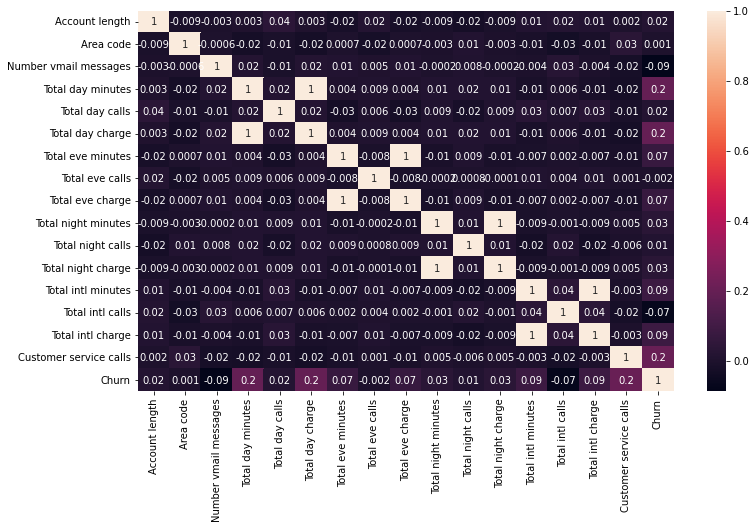

In [14]:
plt.figure(figsize=(12,7))
corr=df.corr()
sns.heatmap(corr,annot=True,fmt='.1g')

In [15]:
# "Total day calls","Total night calls","Total eve calls"  -->True 20%

X=df_final[["Total day charge","Total day minutes","Customer service calls"]]
y=df_final['Churn']

In [16]:
# X=X[0:30000]
# y=y[0:30000]
scaling = MinMaxScaler()
X_scaled=scaling.fit_transform(X)

In [17]:
#X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.40,random_state=32)

In [18]:
# X_train.shape

In [19]:
# y_train.value_counts()

In [20]:
# y_test.iloc[0]

# Testing

In [21]:
y.value_counts()

1    388
0    388
Name: Churn, dtype: int64

In [22]:
ann_object = ANN(300,0.0001,1.5, 3.5)

In [23]:
ann_object.fit(X_scaled,y)

[-4.50912423e-04  3.60441056e-01 -9.16861173e-01]
[-0.71738058  0.04461144  1.79584919]
[-1.10393763 -0.0379332 ]
************************* epoch  0  **************************
##########################################################
w1 [ 0.01418999  0.3798403  -0.91686117]
w2 [-0.71661214  0.04563027  1.79584919]
w3 [-1.14628469 -0.07810383]
b1 1.5322496330057485
b2 3.549982405321573
1.5805312123713875
1.4757324433846848
0.8352377549597263
current loss is :-  1.012289430097514
************************* epoch  2  **************************
##########################################################
w1 [ 0.04229683  0.41705234 -0.91686117]
w2 [-0.71383198  0.04931313  1.79584919]
w3 [-1.22805802 -0.15477025]
b1 1.5978175936786236
b2 3.656001769516223
1.6710052801756539
1.543755779977316
0.7966055845323093
current loss is :-  0.9256103188197765
************************* epoch  4  **************************
##########################################################
w1 [ 0.06771682  0.450

In [24]:
# ann_object.loss_history

In [25]:
ann_object.w1

array([-0.25679222, -0.43674514, -0.91686117])

In [26]:
ann_object.loss_thresold

0.6435757565157274

In [27]:
ann_object.best_weights

[array([-0.25679222, -0.43674514, -0.91686117]),
 array([-0.81328045, -0.21415249,  1.79584919]),
 array([-2.32810875, -0.60882596])]

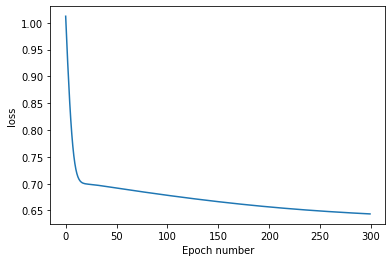

In [28]:
ann_object.train_loss_plot()

In [29]:
df_test=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/churn/churn-bigml-20.csv")

In [30]:
X=df_test[["Total day charge","Total day minutes","Customer service calls"]]#trdhits, chi much or chi sq vertex
y_test=df_test['Churn']
scaling = MinMaxScaler()
X_scaled_test=scaling.fit_transform(X)

In [31]:
y.shape

(776,)

In [32]:
y_test.shape

(667,)

In [33]:
y_test.value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [34]:
predictions=[]
predictions_sigmoid = ann_object.predict(X_scaled_test)
for i in predictions_sigmoid:
  if i>0.5:
    predictions.append(1)
  else:
    predictions.append(0)

              precision    recall  f1-score   support

       False       0.93      0.74      0.82       572
        True       0.30      0.66      0.41        95

    accuracy                           0.73       667
   macro avg       0.61      0.70      0.62       667
weighted avg       0.84      0.73      0.77       667



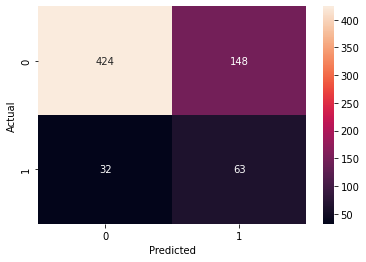

In [35]:
ann_object.test_report(y_test,predictions)

In [91]:
data={
    "w1":ann_object.w1,
    "w2":ann_object.w2,
    "w3":ann_object.w3,
    "b1":ann_object.b1,
    "b2":ann_object.b2
}

In [90]:
data

{'b1': 2.4925928443716883,
 'b2': 5.787596502479327,
 'w1': array([-0.25679222, -0.43674514, -0.91686117]),
 'w2': array([-0.81328045, -0.21415249,  1.79584919]),
 'w3': array([-2.32810875, -0.60882596])}

<h1> Bias tuner </h1>

In [36]:
# class ANNTuner():
#   def __init__(self,model,lower_thresold,upper_thresold):
#     self.model=model
#     self.lower_thresold=lower_thresold
#     self.upper_thresold = upper_thresold
#     self.epochs=100
#     self.learning_rate=0.001
#     self.finalResult={}
#     self.temp=[]
#   def tune(self,X_train,y_train,X_test,y_true):
#     for i in range(0,len(self.lower_thresold)):
#       modelObj = self.model(self.epochs,self.learning_rate,self.lower_thresold[i],self.upper_thresold[i]) 
#       modelObj.fit(X_train,y_train)
#       predictions=[]
#       predictions_sigmoid = modelObj.predict(X_scaled_test)
#       for j in predictions_sigmoid:
#         if j>0.5:
#           predictions.append(1)
#         else:
#           predictions.append(0)
#       print(f"{i}   {predictions_sigmoid}")
#       print(f"{i}   {predictions}")
#       self.temp.append(f1_score(y_true,predictions))
#       self.finalResult[(self.lower_thresold[i],self.upper_thresold[i])]=self.temp[i]
#     return self.finalResult

In [37]:
# ANNTuner_obj = ANNTuner(ANN,[1,1.5,2,2.5,5],[1,3.9,4.5,3.5,10])
# baises_withF1Score = ANNTuner_obj.tune(X_scaled,y,X_scaled_test,y_test)

In [38]:
# print(baises_withF1Score)

<h1> Bias collector </h1>

In [39]:
# #AUC
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds=roc_curve(y_test,predictions)

In [40]:
# loss3=ann_object.loss_history

In [41]:
# loss1=ann_object.loss_history

In [42]:
# loss2=ann_object.loss_history

In [43]:
# bias_values={}

In [44]:
# bias_values[("b1=1,b2=1")]=loss1

In [45]:
# bias_values[("b1=10,b2=15")]=loss2

In [46]:
# bias_values[("b1=3,b2=4.5")]=loss3

In [47]:
# df_graph= pd.DataFrame(bias_values)

In [48]:
# df_graph['b1=1,b2=1']

In [49]:
# plt.plot(df_graph['b1=1,b2=1'],'p')
# plt.plot(df_graph['b1=3,b2=4.5'],"*")
# plt.plot(df_graph['b1=10,b2=15'],"^",markersize=4)
# plt.legend(['b1=1,b2=1',"b1=3,b2=4.5",'b1=10,b2=15'])
# plt.xlabel("Epoch number")
# plt.ylabel("Loss value")
# plt.show()

In [50]:
# keras based model

<h1> Keras based model </h1>

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
model=keras.Sequential()
model.add(keras.layers.Dense(2,input_dim=3,activation="leaky_relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 8         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [55]:
model_history=model.fit(X_scaled,y,epochs=300)

Epoch 1/300
25/25 [==============================] - 1s 2ms/step - loss: 0.6872 - accuracy: 0.5567
Epoch 2/300
25/25 [==============================] - 0s 1ms/step - loss: 0.6860 - accuracy: 0.5271
Epoch 3/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5142
Epoch 4/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6845 - accuracy: 0.4845
Epoch 5/300
25/25 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.4601
Epoch 6/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.4845
Epoch 7/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.4652
Epoch 8/300
25/25 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.4897
Epoch 9/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5361
Epoch 10/300
25/25 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5503
Epoch 11/

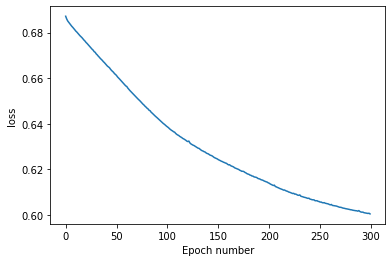

In [56]:
plt.plot(model_history.history['loss'])
plt.xlabel("Epoch number")
plt.ylabel("loss")
plt.show()

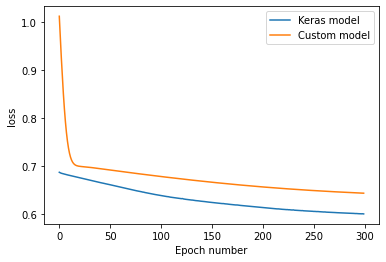

In [57]:
plt.plot(model_history.history['loss'])
plt.plot(ann_object.loss_history)
plt.xlabel("Epoch number")
plt.ylabel("loss")
plt.legend(['Keras model','Custom model'])
plt.show()

In [58]:
predictionsKeras=[]
predictions_sigmoid_keras = model.predict(X_scaled_test)
for i in predictions_sigmoid_keras:
  if i>0.5:
    predictionsKeras.append(1)
  else:
    predictionsKeras.append(0)

In [98]:
model.save_weights("modelChurnKeras.h5")

              precision    recall  f1-score   support

       False       0.95      0.70      0.81       572
        True       0.30      0.78      0.43        95

    accuracy                           0.71       667
   macro avg       0.63      0.74      0.62       667
weighted avg       0.86      0.71      0.75       667



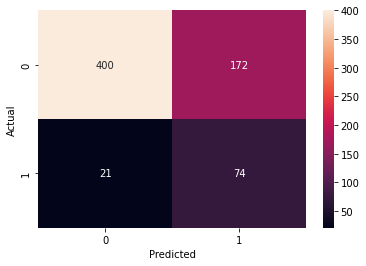

In [59]:
conf_matrix = confusion_matrix(y_test,predictionsKeras)
sns.heatmap(data=conf_matrix,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,predictionsKeras))

<h1> Precision vs Recall Calculator </h1>

In [60]:
#predictions_sigmoid
def PR_cal(custom_thresolds,y_test,predictions_sigmoid):
  precisionData = []
  recallData = []
  for i in custom_thresolds:
    predictions=[]
    for values in predictions_sigmoid:
      if values>i:
        predictions.append(1)
      else:
        predictions.append(0)
    tn, fp, fn, tp=confusion_matrix(y_test,predictions).ravel()
    precision=tp/(tp+fp)
    recall = tp/(tp+fn)
    precisionData.append(precision)
    recallData.append(recall)
  return precisionData,recallData

In [61]:
custom_thresolds=np.linspace(0,0.98,100)
precisionData,recallData=PR_cal(custom_thresolds,y_test,predictions_sigmoid)
precisionDataKeras,recallDataKeras=PR_cal(custom_thresolds,y_test,predictions_sigmoid_keras)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]
/usr/local/li

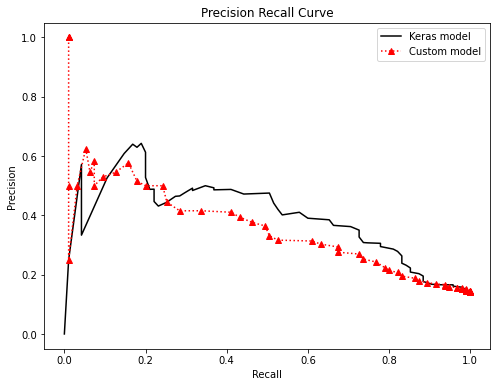

In [62]:
plt.figure(figsize=(8,6))
plt.plot(recallDataKeras,precisionDataKeras,"-k")
plt.plot(recallData,precisionData,"^r:")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(['Keras model',"Custom model"])
plt.title("Precision Recall Curve")

plt.show()

<h1> ROC </h1>

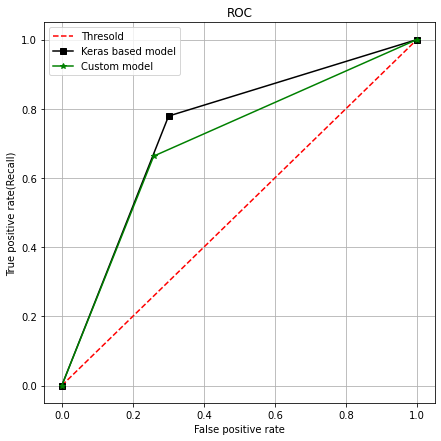

In [63]:
from sklearn.metrics import roc_curve
fpr2, tpr2, thresholds2=roc_curve(y_test,predictions)
fpr1, tpr1, thresholds1=roc_curve(y_test,predictionsKeras)
plt.figure(figsize=(7,7))
plt.plot([0, 1], [0, 1], '--',color='red',label='Thresold')
plt.plot(fpr1, tpr1,color='black',label='Keras based model',marker="s")
plt.plot(fpr2, tpr2,color='green',label='Custom model',marker="*")
plt.ylabel('True positive rate(Recall)')
plt.xlabel('False positive rate')
plt.title('ROC')
plt.grid()
plt.legend()
plt.show()

In [64]:
rocAucCustom = roc_auc_score(y_test,predictions)
rocAucCustom

0.7022083179977916

In [65]:
rocAucKeras = roc_auc_score(y_test,predictionsKeras)
rocAucKeras

0.739124033860876